In [53]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Importing and examining the dataset

In [55]:
diabetes_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
diabetes_data.shape

(768, 9)

In [57]:
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

checking for NaN Values

In [58]:
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [59]:
(diabetes_data == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [60]:
diabetes_data.Pregnancies.skew()

0.9016739791518588

In [61]:
diabetes_data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [62]:
diabetes_data.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

<Axes: >

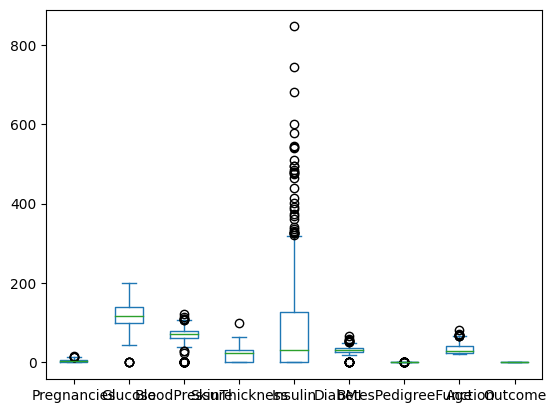

In [63]:
diabetes_data.plot(kind='box')

In [64]:
#Dropping the Outcome column from imputation since 0 values represent NO case, replacing it with nan will result in error
imputation_df = diabetes_data.drop('Outcome', axis=1)
imputation_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


Converting 0's back to np.nan and replacing them with medians of respective columns

In [65]:
imputation_df.replace(0,np.nan, inplace=True)

In [66]:
imputation_df.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

Since the columns with 0 values are both positively and negatively skewed we can use Median imputaion


In [67]:
medians = imputation_df.median()
medians

Pregnancies                   4.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
dtype: float64

In [68]:
imputation_df.fillna(medians, inplace=True)
imputation_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47


In [69]:
imputation_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [70]:
imputation_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.423177,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885
std,2.980481,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Ignoring the outliers

In [71]:
imputation_df.Insulin

0      125.0
1      125.0
2      125.0
3       94.0
4      168.0
       ...  
763    180.0
764    125.0
765    112.0
766    125.0
767    125.0
Name: Insulin, Length: 768, dtype: float64

Scaling the data using MinMax Scaler

In [72]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scaled_df = mms.fit_transform(imputation_df)

In [73]:
scaled_df

array([[0.3125    , 0.67096774, 0.48979592, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.        , 0.26451613, 0.42857143, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.4375    , 0.89677419, 0.40816327, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.25      , 0.49677419, 0.48979592, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.        , 0.52903226, 0.36734694, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.        , 0.31612903, 0.46938776, ..., 0.24948875, 0.10119556,
        0.03333333]])

Setting the target column as Outcome column

In [74]:
target = diabetes_data.Outcome
target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Splitting the Data into train, test samples with random state 42 and test sample size as 20% of the total data

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_df, target, test_size=0.2, random_state=42)

### Naive Bayes

Using the Naive Bayes model from sklearn and training the model.

In [76]:
from sklearn.naive_bayes import GaussianNB
nbModel = GaussianNB()


In [77]:
nbModel.fit(x_train,y_train)

GaussianNB()

In [78]:
y_pred = nbModel.predict(x_test)

In [79]:
from sklearn.metrics import accuracy_score


In [80]:
print('Accuracy Score : ',accuracy_score(y_test,y_pred))

Accuracy Score :  0.7532467532467533


In [81]:
# Testing the impact of unscaled data
# x_train, x_test, y_train, y_test = train_test_split(imputation_df, target, test_size=0.2, random_state=42)
# nbModel = GaussianNB()
# nbModel.fit(x_train,y_train)
# y_pred = nbModel.predict(x_test)
# print('Accuracy Score : ',accuracy_score(y_test,y_pred))

#Scaling has no impact on data since Accuracy Score :  0.7532467532467533 for both cases

### Logistic Regression

Using logistic regression from sklearn and fitting the data into the model

In [82]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [83]:
lr.fit(x_train, y_train)

LogisticRegression()

In [84]:
y_pred = lr.predict(x_test)

In [85]:
print('Accuracy score is : ', accuracy_score(y_test, y_pred))

Accuracy score is :  0.7792207792207793


### SVM

Testing with accuracy of various SVM methods

In [86]:
svc_types = ['linear', 'rbf', 'poly']

In [87]:
accuracy = []

In [88]:
from sklearn.svm import SVC
for support_vector_type in svc_types:
  svc = SVC(kernel=support_vector_type)
  svc.fit(x_train,y_train)
  y_pred = svc.predict(x_test)
  accuracy.append(accuracy_score(y_test, y_pred))

In [89]:
accuracy

[0.7727272727272727, 0.7662337662337663, 0.7792207792207793]

Polynomial kernel has highest accuracy in this case, so using that

In [90]:
svc = SVC(kernel='poly')
svc.fit(x_train, y_train)

SVC(kernel='poly')

In [91]:
y_pred = svc.predict(x_test)

In [92]:
print('Accuracy of the model is : ', accuracy_score(y_test, y_pred))

Accuracy of the model is :  0.7792207792207793


### K Nearest Neighbour

In [93]:
from sklearn.neighbors import KNeighborsClassifier


Determining the best value of k based on accuracy

In [94]:
metric_k = []
number_of_neighbours = np.arange(3,16)
for n in number_of_neighbours:
  knn_clf = KNeighborsClassifier(n_neighbors= n, metric='minkowski', p=2)
  knn_clf.fit(x_train, y_train)
  y_pred = knn_clf.predict(x_test)
  metric_k.append(accuracy_score(y_test, y_pred))

metric_k

[0.7272727272727273,
 0.7402597402597403,
 0.7402597402597403,
 0.7337662337662337,
 0.7337662337662337,
 0.7402597402597403,
 0.7532467532467533,
 0.7597402597402597,
 0.7467532467532467,
 0.7597402597402597,
 0.7532467532467533,
 0.7857142857142857,
 0.7662337662337663]

In [95]:
max(metric_k)

0.7857142857142857

In [96]:
number_of_neighbours

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

We have best accuracy at k=14

In [97]:
knn_clf = KNeighborsClassifier(n_neighbors= 14, metric='minkowski', p=2)
knn_clf.fit(x_train, y_train)
y_pred = knn_clf.predict(x_test)
print('Accuracy Score is : ', accuracy_score(y_test, y_pred))

Accuracy Score is :  0.7857142857142857


### KNN with n=14 has the highest accuracy of 0.7857142857142857

* SVC Poly and Logistic Regression has the second best accuracy of 0.7792207792207793